# I. Intro

#### The purpose of this analysis is to perform an exploratory data analysis on bike sharing data. We will be creating statistics from the dataset as well as looking at the trends.

#### Imports

In [1]:
# for data wrangling
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

## II. Data

#### Importing Bike Sharing Dataset

In [2]:
# csv file is in my working directory, no path is needed
sharedf = pd.read_csv('202108-baywheels-tripdata.csv')

# head of my dataset
sharedf.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A67CB6CC130B48AB,electric_bike,2021-08-07 13:30:11,2021-08-07 14:08:57,S Van Ness Ave at Market St,SF-J23-2,The Embarcadero at Bryant St,SF-G30-2,37.774554,-122.419896,37.787410,-122.388207,member
1,EA6D1C08FB8D1751,classic_bike,2021-08-16 18:34:12,2021-08-16 18:34:14,7th Ave at Cabrillo St,SF-J12,7th Ave at Cabrillo St,SF-J12,37.775120,-122.464998,37.775120,-122.464998,member
2,91E70C07BFA0BAED,electric_bike,2021-08-31 18:28:04,2021-08-31 19:12:40,7th Ave at Cabrillo St,SF-J12,7th Ave at Cabrillo St,SF-J12,37.775129,-122.464995,37.775115,-122.465001,member
3,1A5E792757C33356,electric_bike,2021-08-10 17:52:44,2021-08-10 18:02:46,23rd St at Tennessee St,SF-Q30,McKinnon Ave at 3rd St,SF-W29,37.755349,-122.388703,37.736519,-122.389884,member
4,B2EA7B7711640610,electric_bike,2021-08-11 18:01:21,2021-08-11 18:09:37,23rd St at Tennessee St,SF-Q30,McKinnon Ave at 3rd St,SF-W29,37.755397,-122.388636,37.736311,-122.389896,member


Taking an intial look at the data, we can see that we are looking at the start and end location and times of bike sharing in San Fancisco. We also have the start/end latituade and longitude. The data set also contains information about the type of bike and user for each trip as well as the trips unique id. 

* ride_id: unique id for each bike trip
* rideable_type: type of bike being used (electric_bike, classic_bike, dicked_bike)
* started_at: start time of bike trip given in year-month-day hour:minute:seconds
* ended_at: end time of bike trip given in year-month-day hour:minute:seconds
* start_station_name: address at the start of the bike trip
* start_station_id: id given to the start_station_name 
* end_station_name: address at the end of the bike trip
* end_station_id: id given to the end_station_name
* start_lat: latitude coordinate at initial start time
* start_lng: longitude coordinate at initial start time
* end_lat: latitude coordinate at initial end time
* end_lng: longitude coordinate at initial end time
* member_casual: User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

#### Time Frame of Data

In [3]:
# What is the time frame of our data?
print('First bike ride: '+ str(sharedf.started_at.min())+ 
      ' and the last ride at: '+ str(sharedf.started_at.max()))

First bike ride: 2021-08-01 00:00:25 and the last ride at: 2021-08-31 23:59:58


Now we know that we are looking at bike share data only from August 2021.

#### # of Overall Rides

In [4]:
# shape of dataframe
sharedf.shape

(207023, 13)

Here, we are just taking a look at the the shape of the dataframe. It has 13 columns and 207,023 rows. That means that there was 207,023 bike share rides in the month of August. 

#### Data Types of Columns


In [5]:
# looking at data types
sharedf.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

Looking at the data types, initially, I see that I need to covert the started_at and ended_at object variables into time stamps in order to calculate the duration of the bike rides. I will look into this when I begin cleaning up the dataset later on. 

#### Missing Values

In [6]:
# checking for nulls by column name
sharedf.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    40212
start_station_id      40212
end_station_name      44311
end_station_id        44311
start_lat                 0
start_lng                 0
end_lat                 276
end_lng                 276
member_casual             0
dtype: int64

We can see that start_station_name, start_station_id, end_station_name, and end_stations_id have a significant number of missing values. There are also a few missing values in the end latitude and longitude columns. 

## III. Data Cleaning

#### Changing time strings to date stamps 

In order to extract further information from the start and end times, we will change the data type of these columns from an object to a datetime.

In [7]:
# changing time strings to timestamps
sharedf['started_at'] = pd.to_datetime(sharedf['started_at'])
sharedf['ended_at'] = pd.to_datetime(sharedf['ended_at'])

In [8]:
# updated data types
sharedf.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

#### Creating hour and day columns

Now using the modified columns, we will now extract the hour and day to create new columns for easier analysis later on. We will only be looking at the start hour and day to keep it simple.

In [9]:
# extracting the start hour of the trip
sharedf['started_hour']= sharedf['started_at'].dt.hour

# extracting the start name of the trip
sharedf['started_day']= sharedf['started_at'].dt.day_name()

#### Calculating Duration

Now lets create a new column which is the duration of the bike rides....

In [10]:
# calcualting duration of ride
sharedf['duration'] = sharedf['ended_at']-sharedf['started_at']

#### Negative Duration Trips 


When calculating duration statistics, I came across the shortest ride duration being a negtive time. This is the result of 'ended_at' times, being before 'started_at' times which is impossible. This raises the question if there are other negative time durations. Lets investigate.....

In [11]:
# finding rows that where the end time is before the start time
sharedf.query('started_at>ended_at')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_hour,started_day,duration
7043,924385CCDC8AF804,electric_bike,2021-08-28 11:04:33,2021-08-28 11:04:31,The Embarcadero at Sansome St,SF-A27,The Embarcadero at Sansome St,SF-A27,37.804783,-122.403359,37.804806,-122.403362,member,11,Saturday,-1 days +23:59:58
17607,22ECA866EE266446,classic_bike,2021-08-31 21:00:01,2021-08-31 21:00:00,7th Ave at Clement St,SF-G12,7th Ave at Clement St,SF-G12,37.782439,-122.465377,37.782439,-122.465377,member,21,Tuesday,-1 days +23:59:59
136129,C1A862723457BB5F,electric_bike,2021-08-13 17:11:37,2021-08-13 17:08:44,NaN,NaN,Koshland Park,SF-K21,37.770000,-122.430000,37.773482,-122.427136,casual,17,Friday,-1 days +23:57:07
148962,9F43201C50AC9784,classic_bike,2021-08-13 19:50:42,2021-08-13 19:50:41,Howard St at 8th St,SF-J25,Howard St at 8th St,SF-J25,37.776513,-122.411306,37.776513,-122.411306,member,19,Friday,-1 days +23:59:59
194684,3D8032FC29DBFA41,electric_bike,2021-08-30 07:22:07,2021-08-30 07:21:26,NaN,NaN,NaN,NaN,37.750000,-122.420000,37.750000,-122.420000,member,7,Monday,-1 days +23:59:19


We found five rows with impossible times. Although their durations are only a few minutes and would have very little affect on estimations later on, lets delete these rows from the dataframe so that they do not affect the duration statistics, even if minimally. 

In [12]:
# ride_id of  the rows above with negative durations
neg_dur = ['924385CCDC8AF804','22ECA866EE266446','C1A862723457BB5F','9F43201C50AC9784','3D8032FC29DBFA41']

# updated dataframe without these rows
sharedf=sharedf[~sharedf['ride_id'].isin(neg_dur)]

Dataframe no longer has these five rows. 

In [13]:
sharedf.shape

(207018, 16)

#### Zero Duration Trips

In conducting the exploratory analysis I also came across trips that lasted 0 seconds. Lets investigate how many of these trips there are. We will delete these rows from the data set as well. 

In [14]:
# findings rows where the start time is the same as the end time
sharedf.query('started_at==ended_at').head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_hour,started_day,duration
2949,5D17AE4971878762,electric_bike,2021-08-02 21:35:20,2021-08-02 21:35:20,22nd St Caltrain Station,SF-P30,22nd St Caltrain Station,SF-P30,37.757678,-122.391961,37.757654,-122.391940,casual,21,Monday,0 days
11672,7947DFCA39279AF5,classic_bike,2021-08-15 13:58:55,2021-08-15 13:58:55,S Park St at 3rd St,SF-I29-2,S Park St at 3rd St,SF-I29-2,37.780760,-122.394989,37.780760,-122.394989,member,13,Sunday,0 days
17667,98F57167E5EFCC3D,electric_bike,2021-08-13 10:43:37,2021-08-13 10:43:37,Ryland Park,SJ-K9,Ryland Park,SJ-K9,37.342758,-121.895668,37.342768,-121.895672,member,10,Friday,0 days
27970,9313D4305D6083E4,classic_bike,2021-08-04 16:48:25,2021-08-04 16:48:25,Duboce Park,SF-L19,Duboce Park,SF-L19,37.769223,-122.434062,37.769223,-122.434062,casual,16,Wednesday,0 days
36196,1063217F8793D95A,classic_bike,2021-08-18 13:12:38,2021-08-18 13:12:38,Davis St at Jackson St,SF-D28,Davis St at Jackson St,SF-D28,37.797280,-122.398436,37.797280,-122.398436,member,13,Wednesday,0 days


In [15]:
# updating data frame without these rows 
sharedf=sharedf[sharedf['started_at']!=sharedf['ended_at']]

In [16]:
# updated data frame
sharedf.shape

(206990, 16)

## IV. Data Exploration

#### User Type

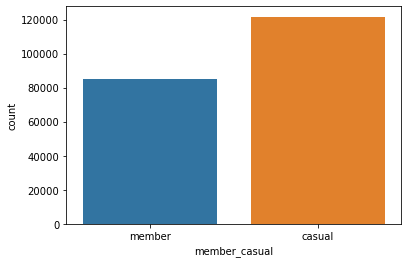

In [17]:
# user type counts
sns.countplot(data=sharedf, x='member_casual')
plt.show()

In [18]:
# type of member and their counts
sharedf.member_casual.value_counts()

casual    121647
member     85343
Name: member_casual, dtype: int64

There are two different types of users, casual and members.  We will look into what role and trends member type plays within the data later on. For now, we can see that there are more casual rides than member rides in the data set.

#### Bike Type

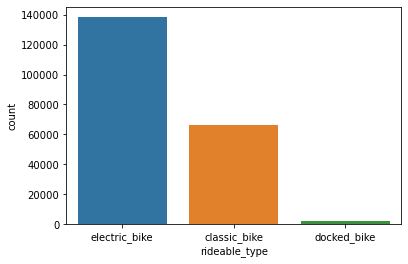

In [19]:
# bike type count
sns.countplot(data=sharedf, x='rideable_type')
plt.show()

In [20]:
# type of bike and their counts
sharedf.rideable_type.value_counts()

electric_bike    138576
classic_bike      66420
docked_bike        1994
Name: rideable_type, dtype: int64

Here, we can see that there are three different types of bikes that riders can use: electric bike, classic bike, docked bike. Later on in the analysis, we'll see what the role of bike type is in the data. Looking at the counts, there are a lot more electric bike rides than the other bike types.

#### Duration

What are the duration statistics of a bike ride?

In [21]:
# statistics of our calculated duration column
sharedf['duration'].describe()

count                       206990
mean     0 days 00:17:56.329552152
std      0 days 01:28:30.155098095
min                0 days 00:00:01
25%                0 days 00:06:24
50%                0 days 00:10:45
75%                0 days 00:17:32
max                9 days 12:31:32
Name: duration, dtype: object

* The average bike ride lasts 17 minutes and 56 seconds.
* The shortest ride was 1 second.
* The longest ride was over 9 days and 12 hours!
* The standard deviation of the bike rides is 1 hour, 28 minutes, and 30 seconds.

Are these statistics different different depending on rider type?

#### Duration by Rider Type

In [22]:
sharedf.groupby('member_casual')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,121647,0 days 00:21:41.602143908,0 days 01:52:55.376285829,0 days 00:00:01,0 days 00:07:16,0 days 00:11:59,0 days 00:19:41,9 days 12:31:32
member,85343,0 days 00:12:35.228407719,0 days 00:27:47.868513997,0 days 00:00:01,0 days 00:05:24,0 days 00:09:13,0 days 00:14:46,1 days 00:59:56


Looking at the duration statistics by rider type, we see that the casual rider has a signfiicantly longer average trip at over 21 minutes when compared to the members average trip duration of over 12 minutes. 

* I think that possibly the member trips might be shorter on average because they are subscribed for the service to use the bikes to commute to work. More of an A to B trip as opposed to a casual bike ride around town. 

Does duration change by bike type?

#### Duration by Bike Type

In [23]:
sharedf.groupby('rideable_type')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
rideable_type,,,,,,,,
classic_bike,66420,0 days 00:21:41.051264679,0 days 01:31:07.944394372,0 days 00:00:01,0 days 00:06:08,0 days 00:10:44,0 days 00:18:05.250000,1 days 01:00:27
docked_bike,1994,0 days 01:52:54.361083249,0 days 11:48:36.947259616,0 days 00:00:01,0 days 00:13:48.250000,0 days 00:23:37,0 days 00:41:25,9 days 12:31:32
electric_bike,138576,0 days 00:14:46.629380267,0 days 00:18:43.740470840,0 days 00:00:01,0 days 00:06:29,0 days 00:10:40,0 days 00:17:03,0 days 08:00:31


No surprise to see that the electric bike ride durations are shorter than the classic bikes.
* Between classic and electric bikes, the average duration of a trip for classic bikes is higher than electric bikes. 

Something else to notice is that there were 138,576 electric bike rides and 66,420 classic bike rides in the month of August. 
* Would be interesting to know how many of each bike type there are.

#### Duration by Day of Week

In [24]:
# data grouped by day of the week and focusing on duration
sharedf.groupby('started_day')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
started_day,,,,,,,,
Friday,29239,0 days 00:18:14.311467560,0 days 01:53:18.296360685,0 days 00:00:01,0 days 00:06:25,0 days 00:10:45,0 days 00:17:12,9 days 12:31:32
Monday,29505,0 days 00:16:17.886256566,0 days 01:28:17.296668750,0 days 00:00:01,0 days 00:06:07,0 days 00:10:14,0 days 00:16:28,8 days 03:17:17
Saturday,30714,0 days 00:21:47.951911180,0 days 01:52:42.685917239,0 days 00:00:01,0 days 00:07:01,0 days 00:12:04,0 days 00:20:13,8 days 05:58:54
Sunday,32229,0 days 00:21:11.516119023,0 days 01:20:34.842487527,0 days 00:00:01,0 days 00:06:54,0 days 00:12:05,0 days 00:20:53,5 days 12:46:46
Thursday,26379,0 days 00:15:47.435573751,0 days 00:54:48.467745704,0 days 00:00:01,0 days 00:06:09,0 days 00:10:13,0 days 00:16:05,2 days 04:03:22
Tuesday,32312,0 days 00:15:49.656226788,0 days 01:03:26.832255631,0 days 00:00:01,0 days 00:06:07,0 days 00:10:07,0 days 00:16:06,3 days 13:24:39
Wednesday,26612,0 days 00:15:43.578986923,0 days 01:27:58.093690373,0 days 00:00:01,0 days 00:06:08,0 days 00:10:10,0 days 00:16:00,5 days 13:47:58


Looking at the duration of the rides by the day of the week, we can see that the average durations from Mon-Thur stay right around 16 minutes. On friday it jumps up by about 2 minutes and on the weekend we see another increase to an average of over 21 minutes. 

#### Day of Week in Dataset

Lets see if there are any daily trends in our dataset...

#### Rider Count By Day

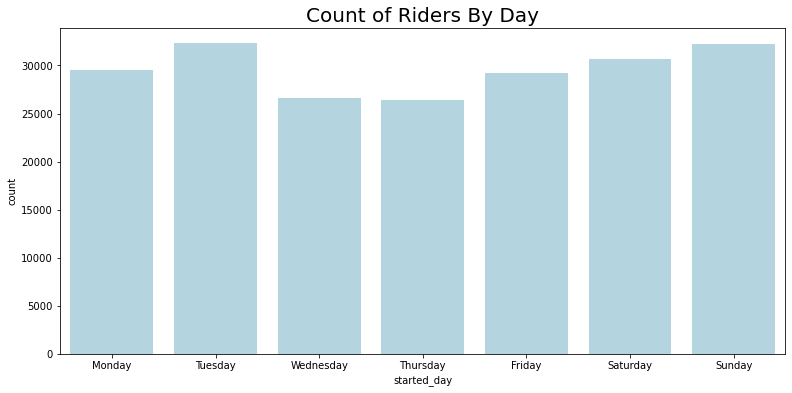

In [25]:
# order of x axis
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]

# figure size
plt.figure(figsize=(13,6))

#plot
sns.countplot(data=sharedf, x='started_day', color='lightblue', order= order)
plt.title('Count of Riders By Day', fontsize=20)
plt.show()

In [26]:
# Count of riders by day
sharedf['started_day'].value_counts()

Tuesday      32312
Sunday       32229
Saturday     30714
Monday       29505
Friday       29239
Wednesday    26612
Thursday     26379
Name: started_day, dtype: int64

In the month of August, we saw the most rides were taken on Tuesday, followed by Sunday and Saturday. The least amount of riders we find are on Thursday. It is interesting to see why the most rides happen on Tuesday. This is something that I am curious about. 

#### Daily Rider Count By Member Type

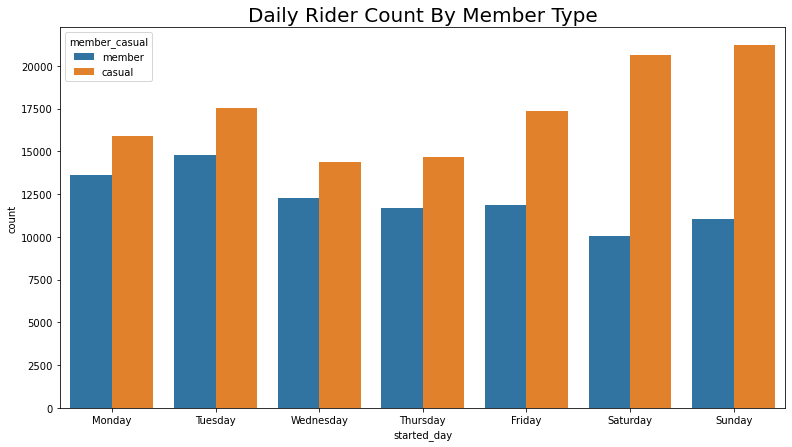

In [27]:
# figure size
plt.figure(figsize=(13, 7))

# plot
sns.countplot(data = sharedf, x='started_day', hue='member_casual', order =order)
plt.title('Daily Rider Count By Member Type', fontsize = 20)
plt.show()

In [28]:
sharedf.groupby(['started_day','member_casual'])['ride_id'].count()

started_day  member_casual
Friday       casual           17358
             member           11881
Monday       casual           15883
             member           13622
Saturday     casual           20650
             member           10064
Sunday       casual           21184
             member           11045
Thursday     casual           14682
             member           11697
Tuesday      casual           17519
             member           14793
Wednesday    casual           14371
             member           12241
Name: ride_id, dtype: int64

* Looking at the members, we can see that the number of riders decreases from the start of the work week reaching its lowest amounts on the weekend.
* Contrary to the members, we see an increase in riders on the weekends. 

#### Start Hour of Bike Ride

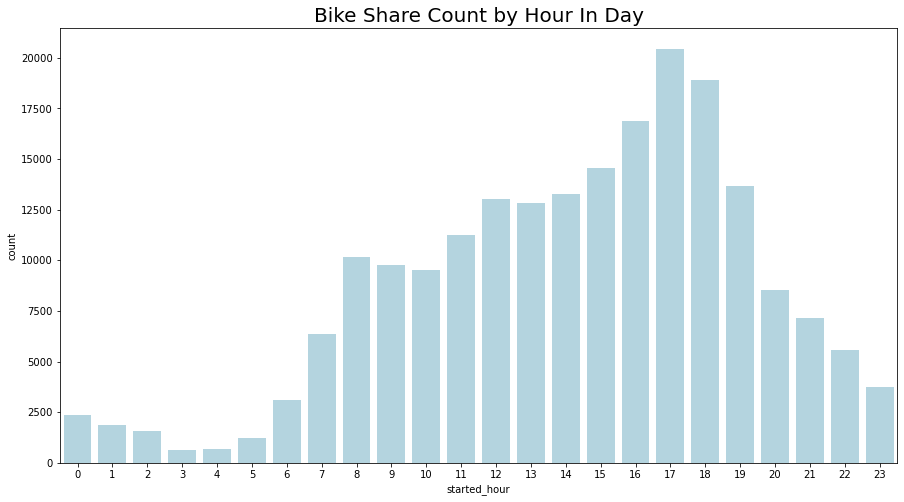

In [29]:
# figure size
plt.figure(figsize=(15,8))

# plot
sns.countplot(data=sharedf, x='started_hour', color ='lightblue')
plt.title('Bike Share Count by Hour In Day', fontsize=20)
plt.show()

* Sharp rise starting at 5am and ending at 8am. Possibly showing the cummuter rush.
* Rise starting at 3pm and rising until 5pm. Cummuters going home. 

Will we see different hourly trend given by the different user types?

#### Start Hour of Bike Ride By User Type

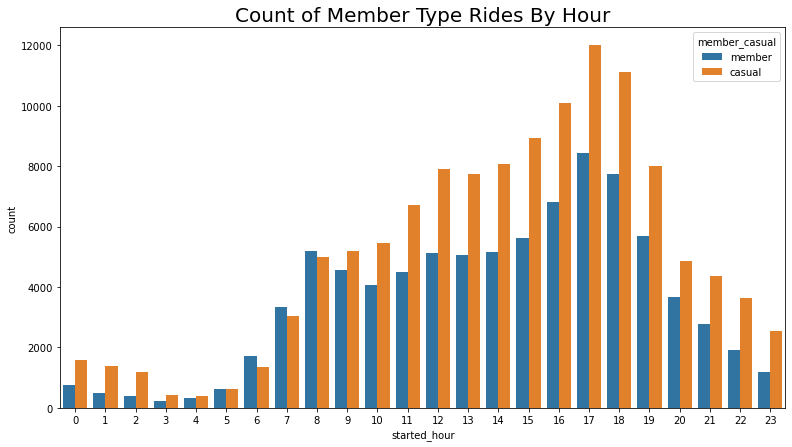

In [30]:
#figure size
plt.figure(figsize=(13, 7))

# plot
sns.countplot(data = sharedf, x='started_hour', hue='member_casual')
plt.title('Count of Member Type Rides By Hour', fontsize = 20)
plt.show()

In this graph, we can better see the trends of members and casual riders. Between the times of 5am and 8am the number of member riders is almost the same or greater than that of casual users. Casual riders out number members in all other hours of the day. We can see a more computer type trend for member users.

Does the hour trend in ride share change between weekends and weekdays?


#### Weekday and Weekend Hourly Trend

In order to see the weekday and weekend hourly trends, I will create two new dataframes, the first containing rides that occured on the weekends and the second with rides occuring on the weekdays. 

In [31]:
# Weekend ride df
weekends= sharedf[sharedf['started_day'].isin(['Saturday','Sunday'])]

# weekday ride df
weekdays= sharedf[~sharedf['started_day'].isin(['Saturday','Sunday'])]

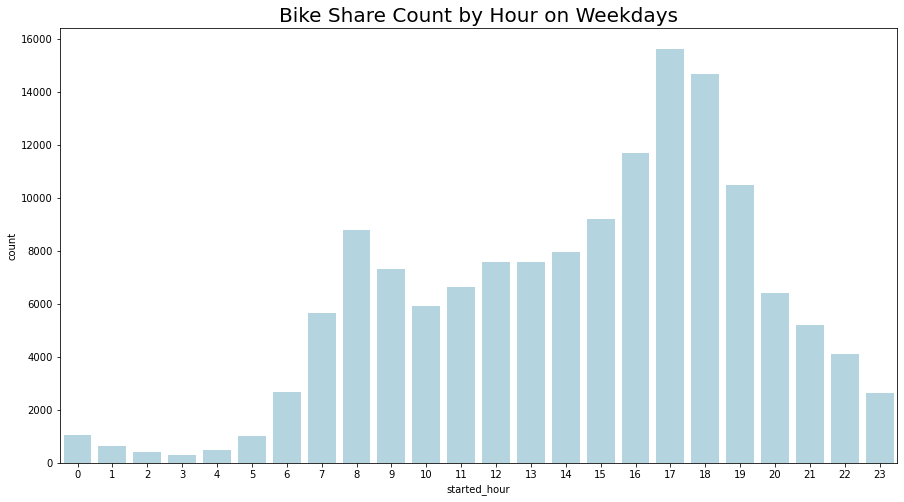

In [32]:
# figure size
plt.figure(figsize=(15,8))

#plot
sns.countplot(data=weekdays, x='started_hour', color ='lightblue')
plt.title('Bike Share Count by Hour on Weekdays', fontsize=20)
plt.show()

On weekdays, we can see somewhat of a bimodal trend in the data. We see two spikes one in the morning and one in the evening. These align with general commute times. 

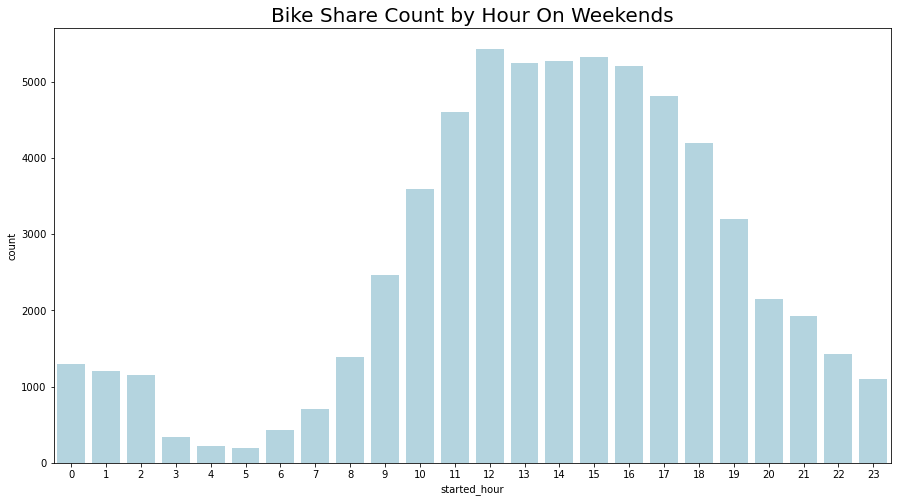

In [33]:
# figure size
plt.figure(figsize=(15,8))

# plot
sns.countplot(data=weekends, x='started_hour', color ='lightblue')
plt.title('Bike Share Count by Hour On Weekends', fontsize=20)
plt.show()

On weekends, we there is more of a unimodial trend in the data. No commute spikes but just a general increase in riders starting at 6am or 7am and increasing every hour until 12pm. From there, it maintains the number or riders and begins to fall starting at 4pm. 

Clearly, bike ride hourly trends are different given the day being a weekday or a weekend. 

#### Station Popularity

I also want to look into the data of the different stations.

First I want a baseline of the different start stations...

#### # of Unique Start Stations

In [34]:
# Start station #
sharedf['start_station_name'].nunique()

465

Starting with the start station, there are 465 different start stations in this dataset. 

#### # of Unique End Stations

In [35]:
# end station #
sharedf['end_station_name'].nunique()

466

We also find 466 different end stations. 

#### Popularity of Start Stations

In [36]:
# Can view all start station counts if you uncomment the code below this line. 
# pd.set_option('display.max_rows', 500)

# start station counts
sharedf.start_station_name.value_counts()

Market St at 10th St                            2423
Powell St BART Station (Market St at 4th St)    2038
Powell St BART Station (Market St at 5th St)    1649
Market St at Steuart St                         1566
17th St at Valencia St                          1456
                                                ... 
26th Ave at International Blvd                     5
Minnesota St Depot                                 3
Foothill Blvd at Harrington Ave                    3
Bond St at High St                                 3
23rd Ave at Foothill Blvd                          2
Name: start_station_name, Length: 465, dtype: int64

Lookin at the complete list of start station counts, it is no surprise to see that Market St at 10th St, Powell St BART Station (Market St at 4th St), and Powell St Bart Station (Market St at 5th St) are the top start stations. This would only make sense because people commuting into the city through bart and muni would use bikes for the 2nd half of their commutes. 

#### Popularity of End Stations 

In [37]:
# Can view all start station counts if you uncomment the code below this line.
# pd.set_option('display.max_rows', 500)

# end station counts
sharedf.end_station_name.value_counts()

Market St at 10th St                            2391
Powell St BART Station (Market St at 4th St)    2105
Powell St BART Station (Market St at 5th St)    1716
Market St at Steuart St                         1668
17th St at Valencia St                          1569
                                                ... 
Bird Ave at Coe Ave                                5
1st St at Younger Ave                              5
Foothill Blvd at Fruitvale Ave                     5
Bond St at High St                                 4
Foothill Blvd at Harrington Ave                    2
Name: end_station_name, Length: 466, dtype: int64

Looking at the end stations, there does not seem to be a big difference between the most popular start and end stations. 

#### Station Popularity On Weekdays

To look at the start and end station popularity given the day, we will use the weekday and weekend data frames we made earlier.

Starting off with the weekday station popularity...

In [38]:
# Can view all start station counts if you uncomment the code below this line. 
# pd.set_option('display.max_rows', 500)

# weekday station popularity
weekdays.start_station_name.value_counts()

Market St at 10th St                                1782
Powell St BART Station (Market St at 4th St)        1343
Market St at Steuart St                             1129
Berry St at 4th St                                  1111
Montgomery St BART Station (Market St at 2nd St)    1105
                                                    ... 
Bird Ave at Coe Ave                                    3
Minnesota St Depot                                     2
Bond St at High St                                     2
Foothill Blvd at Harrington Ave                        2
23rd Ave at Foothill Blvd                              1
Name: start_station_name, Length: 465, dtype: int64

In [39]:
# Can view all start station counts if you uncomment the code below this line. 
# pd.set_option('display.max_rows', 500)

# weekday end station popularity
weekdays.end_station_name.value_counts()

Market St at 10th St                                1770
Powell St BART Station (Market St at 4th St)        1432
Montgomery St BART Station (Market St at 2nd St)    1208
Market St at Steuart St                             1197
San Francisco Caltrain (Townsend St at 4th St)      1195
                                                    ... 
Minnesota St Depot                                     4
Foothill Blvd at Fruitvale Ave                         3
Foothill Blvd at Harrington Ave                        2
Bond St at High St                                     1
1st St at Younger Ave                                  1
Name: end_station_name, Length: 466, dtype: int64

#### Station Popularity on Weekends

In [40]:
# Can view all start station counts if you uncomment the code below this line. 
# pd.set_option('display.max_rows', 500)

#weekend start station popularity
weekends.start_station_name.value_counts()

Powell St BART Station (Market St at 4th St)    695
Market St at 10th St                            641
Fell St at Stanyan St                           612
Powell St BART Station (Market St at 5th St)    571
Mission Dolores Park                            532
                                               ... 
Bond St at High St                                1
Evans Ave at Mendell St                           1
Foothill Blvd at Harrington Ave                   1
26th Ave at International Blvd                    1
Minnesota St Depot                                1
Name: start_station_name, Length: 463, dtype: int64

In [41]:
# Can view all start station counts if you uncomment the code below this line. 
# pd.set_option('display.max_rows', 500)

# weekday end station popularity
weekends.end_station_name.value_counts()

Powell St BART Station (Market St at 4th St)    673
Market St at 10th St                            621
Fell St at Stanyan St                           604
Mission Dolores Park                            591
Powell St BART Station (Market St at 5th St)    567
                                               ... 
Lane St at Revere Ave                             2
Minnesota St Depot                                1
Bird Ave at Coe Ave                               1
Judson Ave at Gennessee St                        1
23rd Ave at Foothill Blvd                         1
Name: end_station_name, Length: 462, dtype: int64

There is a lot to unpack here, but if we just take a glance at the value counts, we can see that on the weekends Mission Dolores Park becomes one of the most popular start and end stations. Mission Dolores Park is a a park where many people go to visit on the weekend etc. 

#### Most Popular Routes 


In [42]:
pd.set_option('display.max_rows', 10)
sharedf[['start_station_name','end_station_name']].value_counts().reset_index(name='count').head(10)

,start_station_name,end_station_name,count
0,Fell St at Stanyan St,Fell St at Stanyan St,154
1,Buchanan St at North Point St,Buchanan St at North Point St,139
2,4th St at Mission Bay Blvd S,Esprit Park,110
3,Fillmore St at Jefferson St,Fillmore St at Jefferson St,108
4,Powell St BART Station (Market St at 4th St),Powell St BART Station (Market St at 4th St),101
5,48th Ave at Cabrillo St,48th Ave at Cabrillo St,99
6,North Point St at Polk St,North Point St at Polk St,94
7,Market St at 10th St,Powell St BART Station (Market St at 4th St),94
8,Esprit Park,4th St at Mission Bay Blvd S,92
9,El Embarcadero at Grand Ave,El Embarcadero at Grand Ave,85


Here I show what the 10 most popular routes. Most have the same starting and end point. 

# V. Conclusion 

Through the analysis of this data set, I found that there were a few data irregulairties. In terms of the time stamps, I saw that there were negative and zero time durations of rides. I deleted these from the dataframe. I also saw very long rides that lasted for several days and in some cases over a week. There is no way to verify this data so I decided to leave it in as rides with durations of these lengths did not make up the majority of the data, in the contrary actually. 

I have learned that members have shorter ride times and different daily riding trends where they show more of a commute pattern. We aslo saw that hourly trends differ when the days are weekends or weekdays. We also looked into the routes and stations of the rides which showed more usage in commuting hotpsots near bart and muni stations. 

I would like to look more into the routes that the riders take. We touched up on the popularity but I would love to see durations times of the most popular routes and even what the durations of these routes would be given the different bike types.  